#Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings("ignore")
df=pd.read_csv('uncleaned_df_Eg.csv')
pd.set_option('display.max_columns', None)
df

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
1,True,True,CsSnBrI,CsSnBr0.3I2.7,NaN
2,True,True,CsSnBrI,CsSnBr1.5I1.5,NaN
3,True,True,CsSnBrI,CsSnBr2.7I0.3,NaN
4,True,True,CsSnBr,CsSnBr3,1.75
...,...,...,...,...,...
43374,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,NaN
43375,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,NaN
43376,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,NaN
43377,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54


#Dropping rows with Nan Value of bandgap

In [ ]:
#Drop rows with Nan values of band_gap
print("Number of rows before removal:", df.shape[0])
df= df.dropna(subset=['Perovskite_band_gap'])
print("Number of rows after removal:", df.shape[0])
df

Number of rows before removal: 43379
Number of rows after removal: 32693


,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
4,True,True,CsSnBr,CsSnBr3,1.75
5,True,True,CsSnI,CsSnI3,1.27
6,True,True,CsSnBrI,CsSnBrI2,1.37
7,True,True,CsSnBrI,CsSnBr2I,1.65
...,...,...,...,...,...
43366,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43367,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43368,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43377,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54


#converting string value of band_gap into float

In [ ]:
df['Perovskite_band_gap'] = pd.to_numeric(df['Perovskite_band_gap'], errors='coerce')

In [ ]:
df.dtypes

,0
Perovskite_dimension_3D,bool
Perovskite_composition_perovskite_ABC3_structure,object
Perovskite_composition_short_form,object
Perovskite_composition_long_form,object
Perovskite_band_gap,float64


In [ ]:
df.isna().sum()

,0
Perovskite_dimension_3D,0
Perovskite_composition_perovskite_ABC3_structure,10
Perovskite_composition_short_form,32
Perovskite_composition_long_form,32
Perovskite_band_gap,17


#Taking true ABX3 structures only

In [ ]:
# Print the number of rows before filtering
print(f"Number of rows before filtering: {len(df)}")

# Drop rows where 'Perovskite_composition_perovskite_ABC3_structure' is NaN
df1= df.dropna(subset=['Perovskite_composition_perovskite_ABC3_structure'])
# Replace NaN values in 'Perovskite_composition_perovskite_ABC3_structure' with True
#df1['Perovskite_composition_perovskite_ABC3_structure'] = df1['Perovskite_composition_perovskite_ABC3_structure'].fillna(True)

# Filter the DataFrame with rows having true perovskite ABX3 structure
df1 = df1[df1['Perovskite_dimension_3D']]
df1 = df1[df1['Perovskite_composition_perovskite_ABC3_structure']]

# Print the number of rows after filtering
print(f"Number of rows after filtering: {len(df1)}")
df1

Number of rows before filtering: 32693
Number of rows after filtering: 31197


,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
4,True,True,CsSnBr,CsSnBr3,1.75
5,True,True,CsSnI,CsSnI3,1.27
6,True,True,CsSnBrI,CsSnBrI2,1.37
7,True,True,CsSnBrI,CsSnBr2I,1.65
...,...,...,...,...,...
43366,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43367,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43368,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43377,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54


#counting and removing multi absorber layers in cell

In [ ]:
#df2=df1.copy()
multi_layer_count = df1['Perovskite_composition_long_form'].str.contains(r'\|').sum()

print(f"Number of entries with multiple perovskite layers: {multi_layer_count}")

Number of entries with multiple perovskite layers: 102


In [ ]:
print(f"Number of rows before filtering: {len(df1)}")

# Convert the column to string type
df1['Perovskite_composition_long_form'] = df1['Perovskite_composition_long_form'].astype(str)

# Remove rows with multiple perovskite layers
df_filtered = df1[~df1['Perovskite_composition_long_form'].str.contains(r'\|')]


# Print the number of rows after filtering
print(f"Number of rows after filtering: {len(df_filtered)}")

print("Filtered DataFrame:")
df_filtered

Number of rows before filtering: 31197
Number of rows after filtering: 31095
Filtered DataFrame:


,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_band_gap
0,True,True,CsSnI,CsSnI3,1.27
4,True,True,CsSnBr,CsSnBr3,1.75
5,True,True,CsSnI,CsSnI3,1.27
6,True,True,CsSnBrI,CsSnBrI2,1.37
7,True,True,CsSnBrI,CsSnBr2I,1.65
...,...,...,...,...,...
43366,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43367,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43368,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54
43377,True,True,CsFAMAPbBrI,Cs0.05FA0.91MA0.04PbBr0.15I2.85,1.54


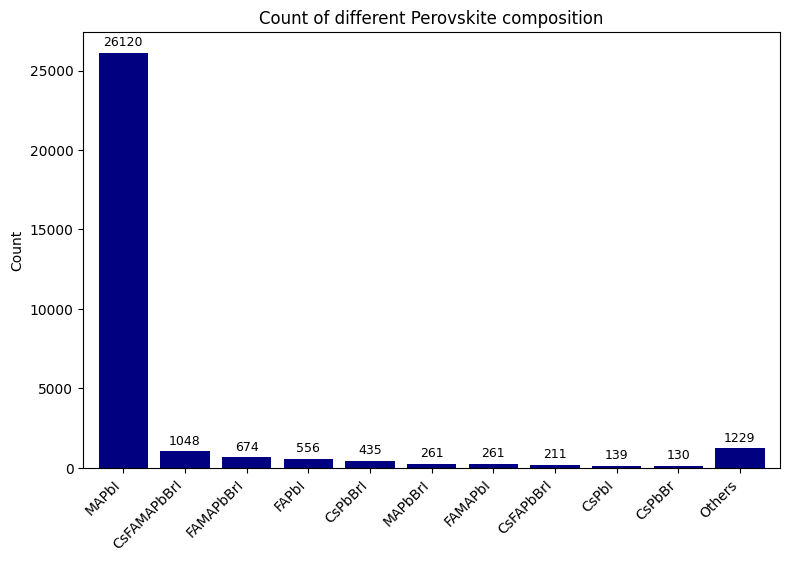

In [ ]:
# Get the value counts for the column
value_counts = df_filtered['Perovskite_composition_short_form'].value_counts()

# Get the top 10 strings
top_10 = value_counts.nlargest(10)

# Sum the remaining counts and label them as "Others"
others_count = value_counts[10:].sum()

# Combine the top 10 with "Others"
top_10_with_others = pd.concat([top_10, pd.Series(others_count, index=['Others'])])

# Plotting the histogram
plt.figure(figsize=(8, 5.5))

# Customize color and bar width
ax = top_10_with_others.plot(kind='bar', color='navy', width=0.8)

# Add the counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the plot
#plt.xlabel('Perovskite Composition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Count of different Perovskite composition')
plt.savefig('Count of different Perovskite composition.png')

# Show the plot
plt.show()

#Merging duplicate layers

In [ ]:
print("\nNumber of rows before grouping:", df_filtered.shape[0])
df2 = df_filtered[['Perovskite_composition_short_form','Perovskite_composition_long_form', 'Perovskite_band_gap']].copy()

# Define a function to get the mode
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Group by 'Perovskite_composition_long_form' and calculate mean of 'Perovskite_band_gap'
df2 = df2.groupby('Perovskite_composition_long_form', as_index=False).agg({
    'Perovskite_band_gap': mode,
})

# Count rows after grouping
print("Number of rows after grouping:", df2.shape[0])

# Display the grouped DataFrame
print("DataFrame after grouping:")
df2



Number of rows before grouping: 31095
Number of rows after grouping: 825
DataFrame after grouping:


,Perovskite_composition_long_form,Perovskite_band_gap
0,(1.3-Pr(NH3)2)0.5Pb1.0I3,1.620
1,(5-AVA)0.05MA0.95PbI3,1.600
2,(6-ACA)0.038MA0.962PbI3,1.590
3,(C6H4NH2)CuBr2I,1.630
4,(C6H4NH2)CuCl2I,2.010
...,...,...
820,MASnI3,1.340
821,PAPbI3,2.320
822,RbPbI3,1.980
823,nan,1.713


In [ ]:
print("\nNumber of rows before filtering:", df2.shape[0])

# Elements to filter for
elements = ['MA', 'FA','BA', 'Cs', 'Pb', 'Sn', 'I', 'Br']

# Create a regex pattern to match only the specified elements
allowed_elements_pattern = r'^(Cs|MA|FA|Pb|Sn|I|Br|[0-9\.])+(?:[\s]*)*$'

# Filter the DataFrame
df2_filtered = df2[df2['Perovskite_composition_long_form'].str.contains(allowed_elements_pattern, regex=True, na=False)]

# Reset index of the final DataFrame
df2_filtered = df2_filtered.reset_index(drop=True)

# Display the filtered DataFrame and counts
print("Filtered DataFrame:")
print("Number of rows after filtering:", df2_filtered.shape[0])
df2_filtered


Number of rows before filtering: 825
Filtered DataFrame:
Number of rows after filtering: 649


,Perovskite_composition_long_form,Perovskite_band_gap
0,Cs0.005Pb0.995Br3,2.290
1,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600
2,Cs0.01MA0.99PbBr0.03I2.97,1.600
3,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270
4,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651
...,...,...
644,MASnBr2.64I0.36,1.830
645,MASnBr2I,1.770
646,MASnBr3,2.080
647,MASnBrI2,1.460


In [ ]:
df3 = df2_filtered[['Perovskite_composition_long_form', 'Perovskite_band_gap']].copy()

df3.reset_index(drop=True, inplace=True)
df3

,Perovskite_composition_long_form,Perovskite_band_gap
0,Cs0.005Pb0.995Br3,2.290
1,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600
2,Cs0.01MA0.99PbBr0.03I2.97,1.600
3,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270
4,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651
...,...,...
644,MASnBr2.64I0.36,1.830
645,MASnBr2I,1.770
646,MASnBr3,2.080
647,MASnBrI2,1.460


In [ ]:
df3.rename(columns={'Perovskite_composition_long_form': 'perovskite', 'Perovskite_band_gap': 'E_g'}, inplace=True)
# Define regex pattern to extract elements and their fractions
pattern = re.compile(r'(Cs|MA|FA|Pb|Sn|I|Br)(\d*\.\d+|\d*)')

# Function to parse the ABX3 string
def parse_abx3(string):
    matches = pattern.findall(string)
    elements = {}
    for element, fraction in matches:
        # Convert fraction to float, default to 1 if fraction is missing
        fraction = float(fraction) if fraction else 1.0
        elements[element] = fraction
    return elements

# Apply the function to the DataFrame column and create new columns
parsed_elements = df3['perovskite'].apply(parse_abx3)
elements_df = pd.json_normalize(parsed_elements)
elements_df = elements_df.fillna(0)
result_df = df3.join(elements_df)

result_df

,perovskite,E_g,Cs,Pb,Br,FA,MA,I,Sn
0,Cs0.005Pb0.995Br3,2.290,0.005,0.995,3.000,0.000,0.00,0.000,0.0
1,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600,0.010,1.000,0.025,0.390,0.60,2.975,0.0
2,Cs0.01MA0.99PbBr0.03I2.97,1.600,0.010,1.000,0.030,0.000,0.99,2.970,0.0
3,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270,0.025,0.500,0.000,0.475,0.50,3.000,0.5
4,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651,0.025,1.000,0.450,0.825,0.15,2.550,0.0
...,...,...,...,...,...,...,...,...,...
644,MASnBr2.64I0.36,1.830,0.000,0.000,2.640,0.000,1.00,0.360,1.0
645,MASnBr2I,1.770,0.000,0.000,2.000,0.000,1.00,1.000,1.0
646,MASnBr3,2.080,0.000,0.000,3.000,0.000,1.00,0.000,1.0
647,MASnBrI2,1.460,0.000,0.000,1.000,0.000,1.00,2.000,1.0


In [ ]:
# Desired column order
desired_order = ['perovskite', 'E_g', 'Cs', 'FA', 'MA', 'Pb', 'Sn', 'I', 'Br']

# Reorder the DataFrame columns
result_df = result_df[desired_order]
result_df

,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.005Pb0.995Br3,2.290,0.005,0.000,0.00,0.995,0.0,0.000,3.000
1,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600,0.010,0.390,0.60,1.000,0.0,2.975,0.025
2,Cs0.01MA0.99PbBr0.03I2.97,1.600,0.010,0.000,0.99,1.000,0.0,2.970,0.030
3,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270,0.025,0.475,0.50,0.500,0.5,3.000,0.000
4,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651,0.025,0.825,0.15,1.000,0.0,2.550,0.450
...,...,...,...,...,...,...,...,...,...
644,MASnBr2.64I0.36,1.830,0.000,0.000,1.00,0.000,1.0,0.360,2.640
645,MASnBr2I,1.770,0.000,0.000,1.00,0.000,1.0,1.000,2.000
646,MASnBr3,2.080,0.000,0.000,1.00,0.000,1.0,0.000,3.000
647,MASnBrI2,1.460,0.000,0.000,1.00,0.000,1.0,2.000,1.000


In [ ]:
# Calculate sums for A, B, and X sites
a_site_sums = result_df[['Cs', 'FA', 'MA']].sum(axis=1)
b_site_sums = result_df[['Pb', 'Sn']].sum(axis=1)
x_site_sums = result_df[['I', 'Br']].sum(axis=1)

# Count valid and invalid rows
a_site_valid = (a_site_sums == 1).sum()
a_site_invalid = (a_site_sums != 1).sum()
b_site_valid = (b_site_sums == 1).sum()
b_site_invalid = (b_site_sums != 1).sum()
x_site_valid = (x_site_sums == 3).sum()
x_site_invalid = (x_site_sums != 3).sum()

# Print results
print(f"A site valid: {a_site_valid}, invalid: {a_site_invalid}")
print(f"B site valid: {b_site_valid}, invalid: {b_site_invalid}")
print(f"X site valid: {x_site_valid}, invalid: {x_site_invalid}")

A site valid: 590, invalid: 59
B site valid: 628, invalid: 21
X site valid: 564, invalid: 85


In [ ]:
invalid_rows = result_df[(a_site_sums != 1) | (b_site_sums != 1) | (x_site_sums != 3)]

# Display invalid rows
print("Invalid rows:")
invalid_rows

Invalid rows:


,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.005Pb0.995Br3,2.290,0.005,0.00,0.00,0.995,0.00,0.00,3.00
17,Cs0.05FA0.07MA0.25PbI3,1.510,0.050,0.07,0.25,1.000,0.00,3.00,0.00
20,Cs0.05FA0.49MA0.16PbBr0.51I2.49,1.730,0.050,0.49,0.16,1.000,0.00,2.49,0.51
25,Cs0.05FA0.68MA0.26Pb0.75Sn0.25Br0.4I2.6,1.360,0.050,0.68,0.26,0.750,0.25,2.60,0.40
28,Cs0.05FA0.76MA0.16PbBr0.49I2.51,1.600,0.050,0.76,0.16,1.000,0.00,2.51,0.49
...,...,...,...,...,...,...,...,...,...
615,MAPbBr0.9I,1.720,0.000,0.00,1.00,1.000,0.00,1.00,0.90
618,MAPbBr1.16I1.74,1.900,0.000,0.00,1.00,1.000,0.00,1.74,1.16
619,MAPbBr1.25I75,1.760,0.000,0.00,1.00,1.000,0.00,75.00,1.25
636,MAPbBrI,1.594,0.000,0.00,1.00,1.000,0.00,1.00,1.00


In [ ]:
# Calculate sums for A, B, and X sites
a_site_sums = result_df[['Cs', 'FA', 'MA']].sum(axis=1)
b_site_sums = result_df[['Pb', 'Sn']].sum(axis=1)
x_site_sums = result_df[['I', 'Br']].sum(axis=1)

# Filter based on ±0.25 tolerance
a_site_valid = ((a_site_sums >= 0.90) & (a_site_sums <= 1.10))
b_site_valid = ((b_site_sums >= 0.90) & (b_site_sums <= 1.10))
x_site_valid = ((x_site_sums >= 2.90) & (x_site_sums <= 3.10))

# Filter dataframe to keep valid rows
valid_rows = result_df[a_site_valid & b_site_valid & x_site_valid]

# Print valid rows
valid_rows.reset_index(drop=True, inplace=True)
print("Valid rows:")
valid_rows

Valid rows:


,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.600,0.010,0.390,0.60,1.0,0.0,2.975,0.025
1,Cs0.01MA0.99PbBr0.03I2.97,1.600,0.010,0.000,0.99,1.0,0.0,2.970,0.030
2,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.270,0.025,0.475,0.50,0.5,0.5,3.000,0.000
3,Cs0.025FA0.825MA0.15PbBr0.45I2.55,1.651,0.025,0.825,0.15,1.0,0.0,2.550,0.450
4,Cs0.02FA0.38MA0.6PbBr0.025I2.975,1.600,0.020,0.380,0.60,1.0,0.0,2.975,0.025
...,...,...,...,...,...,...,...,...,...
546,MASnBr2.64I0.36,1.830,0.000,0.000,1.00,0.0,1.0,0.360,2.640
547,MASnBr2I,1.770,0.000,0.000,1.00,0.0,1.0,1.000,2.000
548,MASnBr3,2.080,0.000,0.000,1.00,0.0,1.0,0.000,3.000
549,MASnBrI2,1.460,0.000,0.000,1.00,0.0,1.0,2.000,1.000


#Heatmap Analysis of cleaned data

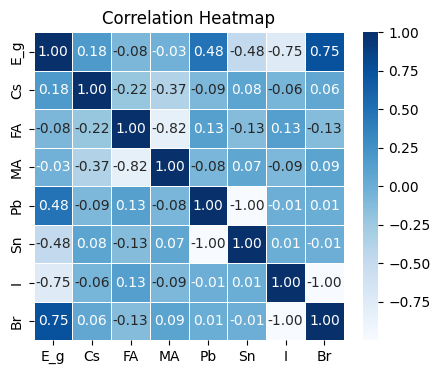

In [ ]:
df4=valid_rows.iloc[:,1:]
corr_matrix = df4.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:
valid_rows.to_csv('cleaned_df_Eg.csv', index=False)

#Download the CSV file
from google.colab import files
files.download('cleaned_df_Eg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>